# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fadhil Syahputra
- **Email:** m247b4ky2802@bangkit.academy
- **ID Dicoding:** fadhil_syahputra_HKuX

## Menentukan Pertanyaan Bisnis

- Faktor Terbesar Apa yang mempengaruhi jumlah pelanggan yang menyewa sepeda?
- Seberapa banyak Registered user dan casual user?


## Import Semua Packages/Library yang Digunakan

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st




## Data Wrangling

### Gathering Data


Dataset characteristics

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


Data Set

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


License

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

In [173]:
bike_day_df = pd.read_csv('/content/submission/data/data_1.csv')
bike_hour_df = pd.read_csv('/content/submission/data/data_2.csv')


Pada Tahap ini dilakukan proses gathering data dengan mengambil data pada direktori

**Insight:**
- "Bike-sharing rental process is highly correlated to the environmental and seasonal settings" pernyataan diatas memberi tahu bahwa faktor lingkungan sangat mempengaruhi kebiasaan dari pengguna rental sepeda
- "For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc." Pernyataan kedua memberikan faktor faktor apa saja yang mempengaruhi kebiasaan pengguna

### Assessing Data

In [174]:
print(bike_day_df.columns)
print(bike_hour_df.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Pada tahap ini ditampilkan nama nama column dari data untuk mengetahui apakah data yang dianalisi merupakan data yang komprehensif dan mempunyai informasi yang relevan dengan pertanyaan

**Insight:**
- Berdasarkan columns yang diberikan data ini memberikan informasi yang sesuai dengan pernyataan "Bike-sharing rental process is highly correlated to the environmental and seasonal settings" dapat disimpulkan data diatas komprehensif
- setelah melakukan pengecekan pada situs  'http://capitalbikeshare.com/system-data'
didapatkan bahwa data diatas orisinal
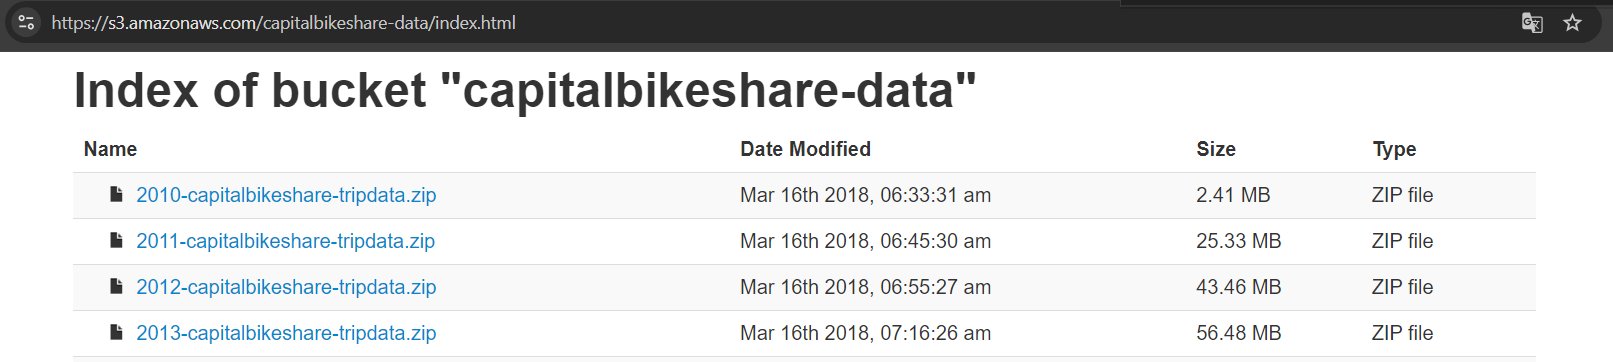


- data diatas merupakan data yang diambil pada tahun 2013. dapat dinyatakan bahwa data ini tidak aktual dikarenakan menggunakan data lawas

In [175]:
print("Nilai Kosong pada dataframe bike_day_df")
print(bike_day_df.isnull().sum())
print('')
print("Nilai Kosong pada dataframe bike_hour_df")
print(bike_hour_df.isnull().sum())

Nilai Kosong pada dataframe bike_day_df
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai Kosong pada dataframe bike_hour_df
instant       1
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       1
weekday       1
workingday    1
weathersit    1
temp          1
atemp         1
hum           1
windspeed     1
casual        1
registered    1
cnt           1
dtype: int64


Pada tahap ini dilakukan pengecekan nilai data apakah ada yang kosong atau tidak

Note for reviewier : saya tanya sama cohort bangkit yang lain katanya nggak ada nilai yang kosong tapi saya cek ada (dokumentasi terlampir pada file zip)

**Insight:**
- Data diatas memiliki nilai yang kosong "NaN Value" sehingga diperlukan untuk melakukan pengisian data

In [176]:
print('Nilai Duplikat pada dataframe bike_day_df')
print(bike_day_df.duplicated().sum())
print('\nNilai Duplikat pada dataframe bike_hour_df')
print(bike_hour_df.duplicated().sum())

Nilai Duplikat pada dataframe bike_day_df
0

Nilai Duplikat pada dataframe bike_hour_df
1592


Pada tahap ini dilakukan pengecekan apakah ada data yang mempunyai nilai duplicat

Note for reviewer : saya tanya sama cohort bangkit yang lain katanya nggak ada nilai duplikat tapi saya cek ada (dokumentasi terlampir pada file zip)

**Insight:**
- Data diatas memiliki nilai duplikat sehingga diperlukan untuk melakukan dropping

### Cleaning Data

**Define**
- Proses cleaning data dilakukan dengan mengisi nilai kosong dengan nilai mean dari data
- kemudian meng-drop data data yang memiliki nilai duplikat
- Kemudian meng-drop data data yang melewati data data yang melewati batas cut

**Pengisian data kosong dengan mean**


In [177]:
bike_day_df_clean = bike_day_df.fillna(bike_day_df.mean(numeric_only=True))
bike_hour_df_clean = bike_hour_df.fillna(bike_hour_df.mean(numeric_only=True))


print("Nilai Kosong pada dataframe bike_day_df_clean")
print(bike_day_df_clean.isnull().sum())
print('')
print("Nilai Kosong pada dataframe bike_hour_df_clean")
print(bike_hour_df_clean.isnull().sum())

Nilai Kosong pada dataframe bike_day_df_clean
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai Kosong pada dataframe bike_hour_df_clean
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Pada Tahap ini dilakukan pengisian data yang memiliki nilai kosong dengan nilai mean pada data tersebut

**Penghapusan Baris data duplicate**

In [178]:
bike_day_df_clean = bike_day_df_clean.drop_duplicates()
bike_hour_df_clean = bike_hour_df_clean.drop_duplicates()

print('Nilai Duplikat pada dataframe bike_day_df_clean')
print(bike_day_df_clean.duplicated().sum())
print('\nNilai Duplikat pada dataframe bike_hour_df_clean')
print(bike_hour_df_clean.duplicated().sum())


Nilai Duplikat pada dataframe bike_day_df_clean
0

Nilai Duplikat pada dataframe bike_hour_df_clean
0


Pada tahap ini dilakukan penghapusan baris pada data yang mempunyai nilai duplikat

**Perbandingan data yang sudah ditangani duplicate dan nilai kosongnya**


In [231]:
print("Perbandingan Jumlah Nilai Kosong")
print("-" * 30)
print("bike_day_df (Sebelum Cleaning):", bike_day_df.isnull().sum().sum())
print("bike_day_df_clean (Setelah Cleaning):", bike_day_df_clean.isnull().sum().sum())
print("bike_hour_df (Sebelum Cleaning):", bike_hour_df.isnull().sum().sum())
print("bike_hour_df_clean (Setelah Cleaning):", bike_hour_df_clean.isnull().sum().sum())

print("\nPerbandingan Jumlah Nilai Duplikat")
print("-" * 30)
print("bike_day_df (Sebelum Cleaning):", bike_day_df.duplicated().sum())
print("bike_day_df_clean (Setelah Cleaning):", bike_day_df_clean.duplicated().sum())
print("bike_hour_df (Sebelum Cleaning):", bike_hour_df.duplicated().sum())
print("bike_hour_df_clean (Setelah Cleaning):", bike_hour_df_clean.duplicated().sum())


Perbandingan Jumlah Nilai Kosong
------------------------------
bike_day_df (Sebelum Cleaning): 0
bike_day_df_clean (Setelah Cleaning): 0
bike_hour_df (Sebelum Cleaning): 12
bike_hour_df_clean (Setelah Cleaning): 0

Perbandingan Jumlah Nilai Duplikat
------------------------------
bike_day_df (Sebelum Cleaning): 0
bike_day_df_clean (Setelah Cleaning): 0
bike_hour_df (Sebelum Cleaning): 1592
bike_hour_df_clean (Setelah Cleaning): 0


**Tahap Pencarian nilai cutt off dari data df clean**

In [180]:
num_bike_day_df_clean = bike_day_df_clean.select_dtypes(include=np.number)
num_bike_hour_df_clean = bike_hour_df_clean.select_dtypes(include=np.number)

def outlier(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    return minimum, maximum

def find_cutoff_for_dataframe(df):
    cutoffs = {}
    for column in df.columns:
        minimum, maximum = outlier(df[column])
        cutoffs[column] = (minimum, maximum)
    return cutoffs
day_cutoffs_clean = find_cutoff_for_dataframe(num_bike_day_df_clean)
hour_cutoffs_clean = find_cutoff_for_dataframe(num_bike_hour_df_clean)

print('Nilai Cut-off pada setiap kolom bike_day_df_clean:')
for col, cutoff in day_cutoffs_clean.items():
    print(f'{col}: {cutoff}')

print('\nNilai Cut-off pada setiap kolom bike_hour_df_clean:')
for col, cutoff in hour_cutoffs_clean.items():
    print(f'{col}: {cutoff}')


Nilai Cut-off pada setiap kolom bike_day_df_clean:
instant: (-364.0, 1096.0)
season: (0.5, 4.5)
yr: (-1.5, 2.5)
mnth: (-5.0, 19.0)
holiday: (0.0, 0.0)
weekday: (-5.0, 11.0)
workingday: (-1.5, 2.5)
weathersit: (-0.5, 3.5)
temp: (-0.14041600000000015, 1.1329160000000003)
atemp: (-0.06829675000000018, 1.0147412500000002)
hum: (0.20468725, 1.0455212500000002)
windspeed: (-0.012446750000000034, 0.38061125)
casual: (-855.25, 2266.75)
registered: (-922.25, 8195.75)
cnt: (-1054.0, 10162.0)

Nilai Cut-off pada setiap kolom bike_hour_df_clean:
instant: (-8687.0, 26067.0)
season: (0.5, 4.5)
yr: (-1.5, 2.5)
mnth: (-5.0, 19.0)
hr: (-12.0, 36.0)
holiday: (0.0, 0.0)
weekday: (-5.0, 11.0)
workingday: (-1.5, 2.5)
weathersit: (-0.5, 3.5)
temp: (-0.13999999999999996, 1.1400000000000001)
atemp: (-0.09854999999999997, 1.0530499999999998)
hum: (0.029999999999999916, 1.23)
windspeed: (-0.1193, 0.4775)
casual: (-62.0, 114.0)
registered: (-245.0, 499.0)
cnt: (-321.5, 642.5)


Pada tahap ini dicari nilai cut off data yang bertujuan untuk mengidentifikasi pencilan (*outliers*)

In [181]:
def count_outliers(df, cutoffs):
    outlier_counts = {}
    for column in df.columns:
        minimum, maximum = cutoffs[column]
        below_min = (df[column] < minimum).sum()
        above_max = (df[column] > maximum).sum()
        total_outliers = below_min + above_max
        outlier_counts[column] = total_outliers
    return outlier_counts


day_outliers = count_outliers(num_bike_day_df_clean, day_cutoffs_clean)
hour_outliers = count_outliers(num_bike_hour_df_clean, hour_cutoffs_clean)


print('Jumlah data yang melewati nilai cut-off pada bike_day_df:')
for col, count in day_outliers.items():
    print(f'{col}: {count}')

print('\nJumlah data yang melewati nilai cut-off pada bike_hour_df:')
for col, count in hour_outliers.items():
    print(f'{col}: {count}')

Jumlah data yang melewati nilai cut-off pada bike_day_df:
instant: 0
season: 0
yr: 0
mnth: 0
holiday: 21
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 2
windspeed: 13
casual: 44
registered: 0
cnt: 0

Jumlah data yang melewati nilai cut-off pada bike_hour_df:
instant: 0
season: 1
yr: 1
mnth: 1
hr: 1
holiday: 501
weekday: 0
workingday: 0
weathersit: 3
temp: 0
atemp: 0
hum: 22
windspeed: 342
casual: 1192
registered: 680
cnt: 505


Pada tahap ini dicari jumlah data yang melewati nilai cutoff

**Pembuatan Dataframes yang khusus memuat data outlier**


In [182]:
def create_outlier_dataframe(df, cutoffs):
    outlier_df = pd.DataFrame()
    for column in df.columns:
        minimum, maximum = cutoffs[column]
        outliers = df[(df[column] < minimum) | (df[column] > maximum)]
        outlier_df = pd.concat([outlier_df, outliers])
    return outlier_df.drop_duplicates()


bike_day_df_outliers = create_outlier_dataframe(num_bike_day_df_clean, day_cutoffs_clean)
bike_hour_df_outliers = create_outlier_dataframe(num_bike_hour_df_clean, hour_cutoffs_clean)

print("Jumlah data outlier pada bike_day_df:", len(bike_day_df_outliers))
print("Jumlah data outlier pada bike_hour_df:", len(bike_hour_df_outliers))




Jumlah data outlier pada bike_day_df: 76
Jumlah data outlier pada bike_hour_df: 2581


Tahap ini dimaksudkan untuk menghapus baris yang memiliki data pencilan

In [183]:
bike_day_df_outliers.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,52,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,105,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,150,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,185,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043


In [184]:
bike_hour_df_outliers.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17379,9352.403247,0.0896,12,111,123,0.030099,3.007801,0.680302,1.434558,0.48396,0.464395,0.628241,0.189934,34.815086,155.098677,189.913763
372,373.000000,1.0000,0,1,0,1.000000,1.000000,0.000000,2.000000,0.20000,0.197000,0.470000,0.223900,1.000000,16.000000,17.000000
373,374.000000,1.0000,0,1,1,1.000000,1.000000,0.000000,2.000000,0.20000,0.197000,0.440000,0.194000,1.000000,15.000000,16.000000
374,375.000000,1.0000,0,1,2,1.000000,1.000000,0.000000,2.000000,0.18000,0.166700,0.430000,0.253700,0.000000,8.000000,8.000000
375,376.000000,1.0000,0,1,3,1.000000,1.000000,0.000000,2.000000,0.18000,0.181800,0.430000,0.194000,0.000000,2.000000,2.000000


**Penghapusan outlier pada data df clean**

In [185]:
bike_day_df_clean_no_outliers = bike_day_df_clean[~bike_day_df_clean.index.isin(bike_day_df_outliers.index)]
bike_hour_df_clean_no_outliers = bike_hour_df_clean[~bike_hour_df_clean.index.isin(bike_hour_df_outliers.index)]

print("Jumlah baris pada bike_day_df_clean:", len(bike_day_df_clean))
print("Jumlah baris pada bike_day_df_clean_no_outliers:", len(bike_day_df_clean_no_outliers))

print("Jumlah baris pada bike_hour_df_clean:", len(bike_hour_df_clean))
print("Jumlah baris pada bike_hour_df_clean_no_outliers:", len(bike_hour_df_clean_no_outliers))


Jumlah baris pada bike_day_df_clean: 731
Jumlah baris pada bike_day_df_clean_no_outliers: 655
Jumlah baris pada bike_hour_df_clean: 17380
Jumlah baris pada bike_hour_df_clean_no_outliers: 14799


Pada Tahap ini dilakukan penghapusan baris yang mengandung pencilan

**Perbandingan data df sebelum di clean dan df sesuadah di clean**


In [186]:
print("Perbandingan Data Sebelum dan Sesudah Cleaning")
print("-" * 30)
print("bike_day_df (Sebelum Cleaning):")
print("Jumlah Nilai Kosong:", bike_day_df.isnull().sum().sum())
print("Jumlah Nilai Duplikat:", bike_day_df.duplicated().sum())
print("Jumlah Outlier (estimasi):", len(create_outlier_dataframe(num_bike_day_df_clean, day_cutoffs_clean)))  # Menggunakan fungsi yang sudah dibuat sebelumnya

print("\nbike_day_df_clean_no_outliers (Setelah Cleaning):")
print("Jumlah Nilai Kosong:", bike_day_df_clean_no_outliers.isnull().sum().sum())
print("Jumlah Nilai Duplikat:", bike_day_df_clean_no_outliers.duplicated().sum())
print("Jumlah Outlier:", len(create_outlier_dataframe(bike_day_df_clean_no_outliers.select_dtypes(include=np.number), day_cutoffs_clean)))

print("\n\nbike_hour_df (Sebelum Cleaning):")
print("Jumlah Nilai Kosong:", bike_hour_df.isnull().sum().sum())
print("Jumlah Nilai Duplikat:", bike_hour_df.duplicated().sum())
print("Jumlah Outlier :", len(create_outlier_dataframe(num_bike_hour_df_clean, hour_cutoffs_clean)))

print("\nbike_hour_df_clean_no_outliers (Setelah Cleaning):")
print("Jumlah Nilai Kosong:", bike_hour_df_clean_no_outliers.isnull().sum().sum())
print("Jumlah Nilai Duplikat:", bike_hour_df_clean_no_outliers.duplicated().sum())
print("Jumlah Outlier:", len(create_outlier_dataframe(bike_hour_df_clean_no_outliers.select_dtypes(include=np.number), hour_cutoffs_clean)))



# Simpan data yang sudah dibersihkan ke dalam variabel baru
bike_day_cleaned = bike_day_df_clean_no_outliers
bike_hour_cleaned = bike_hour_df_clean_no_outliers


Perbandingan Data Sebelum dan Sesudah Cleaning
------------------------------
bike_day_df (Sebelum Cleaning):
Jumlah Nilai Kosong: 0
Jumlah Nilai Duplikat: 0
Jumlah Outlier (estimasi): 76

bike_day_df_clean_no_outliers (Setelah Cleaning):
Jumlah Nilai Kosong: 0
Jumlah Nilai Duplikat: 0
Jumlah Outlier: 0


bike_hour_df (Sebelum Cleaning):
Jumlah Nilai Kosong: 12
Jumlah Nilai Duplikat: 1592
Jumlah Outlier : 2581

bike_hour_df_clean_no_outliers (Setelah Cleaning):
Jumlah Nilai Kosong: 0
Jumlah Nilai Duplikat: 0
Jumlah Outlier: 0


Tahap ini dimaksudkan untuk memastikan sekali lagi bahwa data yang ingin dianalis sudah bersih (Clean) dari pencilan, nilai kosong, dan nilai duplikat



## Exploratory Data Analysis (EDA)

### Explore data bike_day_cleaned dan bike_hour_cleaned

In [204]:
bike_day_cleaned.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
unique,NaN,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.366412,NaN,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,NaN,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,NaN,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,NaN,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,NaN,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,NaN,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000


In [188]:
bike_hour_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000
mean,8429.853639,2.489898,0.474965,6.511318,11.165890,0.0,3.024191,0.734847,1.444354,0.483410,0.464407,0.644950,0.180161,23.769647,125.060342,148.829989
std,5021.788339,1.119989,0.499390,3.496449,7.152273,0.0,1.953634,0.441430,0.647801,0.190873,0.170517,0.188672,0.111812,26.523112,113.946827,131.380486
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4096.500000,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,28.000000,33.000000
50%,8245.000000,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,13.000000,100.000000,120.000000
75%,12743.500000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,37.000000,186.000000,229.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.462700,114.000000,499.000000,594.000000


**Menyiapkan df dengan variabel variabel yang relevan terhadap pertanyaan 1**

In [205]:
relevant_columns_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
relevant_columns_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


bike_day_df_relevant_q1 = bike_day_cleaned[relevant_columns_day]
bike_hour_df_relevant_q1 = bike_hour_cleaned[relevant_columns_hour]



Tahap ini dimaksudkan untuk menyiapkan informasi yang relevan dengan data cnt sesuai dengan pernyataan "Bike-sharing rental process is highly correlated to the environmental and seasonal settings"

**Mencari nilai korelasi variabel variabel yang relevan dengan jumlah pengguna**


In [190]:
correlation_day = bike_day_df_relevant_q1.corr()['cnt'].sort_values(ascending=False)
correlation_hour = bike_hour_df_relevant_q1.corr()['cnt'].sort_values(ascending=False)

print("Korelasi variabel dengan jumlah pengguna (bike_day_df_relevant_q1):")
print(correlation_day)

print("\nKorelasi variabel dengan jumlah pengguna (bike_hour_df_relevant_q1):")
print(correlation_hour)


Korelasi variabel dengan jumlah pengguna (bike_day_df_relevant_q1):
cnt           1.000000
atemp         0.626283
temp          0.624954
yr            0.558890
season        0.417237
mnth          0.302257
workingday    0.187123
weekday       0.029246
hum          -0.139486
windspeed    -0.229613
weathersit   -0.308265
holiday            NaN
Name: cnt, dtype: float64

Korelasi variabel dengan jumlah pengguna (bike_hour_df_relevant_q1):
cnt           1.000000
hr            0.448201
temp          0.363949
atemp         0.361046
season        0.168729
workingday    0.157945
yr            0.151157
mnth          0.122223
windspeed     0.103617
weekday       0.028784
weathersit   -0.115341
hum          -0.305987
holiday            NaN
Name: cnt, dtype: float64


**Insight pada data per hari:**
- Nilai korelasi terbesar adalah antara atemp (temperature feels-like) dengan cnt (jumlah pengguna), yaitu 0.626. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara suhu yang dirasakan dan jumlah pengguna. Semakin nyaman atau hangat suhu terasa, semakin banyak orang yang menggunakan sepeda.
- Nilai korelasi terkecil (terbesar negatif) adalah antara weathersit (kondisi cuaca) dan cnt, yaitu -0.308. Ini menunjukkan hubungan negatif moderat, di mana cuaca buruk (seperti hujan atau berkabut) cenderung mengurangi jumlah pengguna sepeda.

**Insight pada data per jam:**
- Nilai korelasi terbesar adalah antara hr (jam) dengan cnt, yaitu 0.448. Ini menunjukkan hubungan positif moderat, yang berarti jam tertentu dalam sehari (kemungkinan jam sibuk) berkontribusi pada peningkatan penggunaan sepeda.
- Nilai korelasi terkecil adalah antara hum (kelembaban) dan cnt, yaitu -0.306. Ini menunjukkan hubungan negatif moderat, di mana kelembaban yang tinggi berkontribusi pada penurunan jumlah pengguna sepeda.


In [191]:
total_registered_users = bike_day_cleaned['registered'].sum()
total_casual_users = bike_day_cleaned['casual'].sum()

total_registered_users_hour = bike_hour_cleaned['registered'].sum()
total_casual_users_hour = bike_hour_cleaned['casual'].sum()

print(f"Total Registered Users: {total_registered_users}")
print(f"Total Casual Users: {total_casual_users}")

print(f"\nTotal Registered Users: {total_registered_users_hour}")
print(f"Total Casual Users: {total_casual_users_hour}")

Total Registered Users: 2397403
Total Casual Users: 483128

Total Registered Users: 1850768.0
Total Casual Users: 351767.0


**Insight:**
- Data harian menunjukkan bahwa sekitar 83.23% atau sebesar 2,397,403 pengguna adalah terdaftar, dan 16.77% atau sebesar 483,128 pengguna adalah pengguna kasual.
- Data per jam menunjukkan bahwa sekitar 84.03% atau sebesar 1,850,768 pengguna adalah terdaftar, dan 15.97% atau sebesar 351,767 pengguna adalah pengguna kasual.

**Hubungan antara hari dan jumlah pengguna pada data bike_day_cleaned**




In [219]:
rata_rata_berdasarkan_hari = bike_hour_cleaned.groupby('weekday')['cnt'].mean()
print(rata_rata_berdasarkan_hari.std())
rata_rata_berdasarkan_hari

23.51429281413279


,cnt
weekday,
0.0,112.747368
1.0,155.084275
2.0,159.840125
3.0,155.101687
4.0,165.296330
5.0,170.434511
6.0,115.877138


**Insight:**
- dapat dilihat pada datas diatas bahwa jumlah pengguna sepeda tidak terlalu berkorelasi dengan hari
- hal ini juga sesuai dengan rasio deviasi dan jumlah pengguna

**Hubungan antara jam dan jumlah pengguna pada data bike_hour_cleaned**




In [230]:
rata_rata_berdasarkan_jam = bike_hour_cleaned.groupby('hr')['cnt'].mean()
print(rata_rata_berdasarkan_jam.std())
rata_rata_berdasarkan_jam
print('index data maksimum :', rata_rata_berdasarkan_jam.idxmax(), 'dengan nilai data :', rata_rata_berdasarkan_jam.max())
print('index data minimum :', rata_rata_berdasarkan_jam.idxmin(), 'dengan nilai data :', rata_rata_berdasarkan_jam.min())

98.90125443837638
index data maksimum : 17 dengan nilai data : 316.23561643835615
index data minimum : 4 dengan nilai data : 6.431784107946027


**Insight:**
- dapat dilihat pada datas diatas bahwa jumlah pengguna dan waktu sangat signifikan korelasinya
- hal ini juga sesuai dengan nilai deiviasinya
- Rata rata pesepeda bersepeda pada jam 17 dan tidak bersepeda pada jam 4


**Hubungan antara weather sit dan jumlah pengguna pada data bike_hour_cleaned dan bike_day_cleaned**




In [233]:
rata_rata_berdasarkan_weathersit_day = bike_day_cleaned.groupby('weathersit')['cnt'].mean()
rata_rata_berdasarkan_weathersit_hour = bike_hour_cleaned.groupby('weathersit')['cnt'].mean()

,cnt
weathersit,
1.0,157.149668
2.0,145.639303
3.0,97.015649


In [234]:
rata_rata_berdasarkan_weathersit_day

,cnt
weathersit,
1,4778.012255
2,3937.691630
3,1862.300000


In [235]:
rata_rata_berdasarkan_weathersit_hour

,cnt
weathersit,
1.0,157.149668
2.0,145.639303
3.0,97.015649


**Insight**
- Dapat dilihat bahwa kondisi cuaca sangat mempengaruhi jumlah pengguna.
- Saat cuaca cerah (weathersit = 1), rata-rata pengguna paling banyak baik pada data harian maupun per jam.
- Saat cuaca berawan (weathersit = 2), rata-rata pengguna sedikit lebih rendah dibandingkan dengan cuaca cerah.
- Saat cuaca ringan (weathersit = 3), rata-rata pengguna turun signifikan dibandingkan dengan kondisi cuaca cerah dan berawan.

**Hubungan antara hum dan jumlah pengguna pada data bike_hour_cleaned dan bike_day_cleaned**




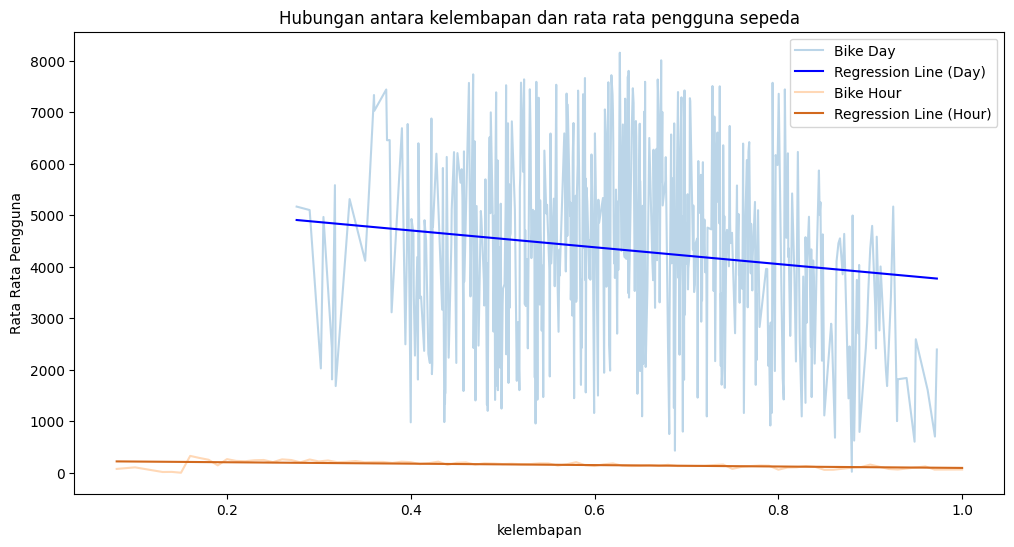

Slope garis regresi Bike Day: -1631.3579678385838
Slope garis regresi Bike Hour: -137.45776477736567
Rasio slope : 0.08425971950195946


In [250]:
rata_rata_berdasarkan_hum_day = bike_day_cleaned.groupby('hum')['cnt'].mean()
rata_rata_berdasarkan_hum_hour = bike_hour_cleaned.groupby('hum')['cnt'].mean()

plt.figure(figsize=(12, 6))
plt.plot(rata_rata_berdasarkan_hum_day.index, rata_rata_berdasarkan_hum_day.values, label='Bike Day', alpha=0.3 )
x_day = rata_rata_berdasarkan_hum_day.index.values.astype(float)  # Convert index to numeric
y_day = rata_rata_berdasarkan_hum_day.values
m_day, b_day = np.polyfit(x_day, y_day, 1)  # Calculate slope and intercept
plt.plot(x_day, m_day * x_day + b_day, color='blue', label='Regression Line (Day)')
plt.plot(rata_rata_berdasarkan_hum_hour.index, rata_rata_berdasarkan_hum_hour.values, label='Bike Hour', alpha=0.3)
x_hour = rata_rata_berdasarkan_hum_hour.index.values.astype(float)  # Convert index to numeric
y_hour = rata_rata_berdasarkan_hum_hour.values
m_hour, b_hour = np.polyfit(x_hour, y_hour, 1)  # Calculate slope and intercept
plt.plot(x_hour, m_hour * x_hour + b_hour, color='chocolate', label='Regression Line (Hour)')
plt.xlabel('kelembapan')
plt.ylabel('Rata Rata Pengguna')
plt.title('Hubungan antara kelembapan dan rata rata pengguna sepeda')
plt.legend()
plt.show()

print(f"Slope garis regresi Bike Day: {m_day}")
print(f"Slope garis regresi Bike Hour: {m_hour}")
print(f"Rasio slope : {m_hour/m_day}")


Insight
- Dapat dilihat bahwa kelembapan secara umum memiliki korelasi negatif dengan jumlah pengguna sepeda, yang sesuai dengan temuan analisis korelasi sebelumnya.
- Ketika kelembapan rendah, jumlah pengguna cenderung lebih tinggi, sedangkan ketika kelembapan tinggi, jumlah pengguna cenderung lebih rendah
- Hal ini terjadi di kedua dataset namun pada dataset harian pengaruh humidity lebih signifikan dibanding dengan dataset per jam hal ini dibuktikan dengan kecilnya rasio slope diantara dua garis tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor Terbesar Apa yang mempengaruhi jumlah pelanggan yang menyewa sepeda?

####Data Harian

#####Korelasi Positif

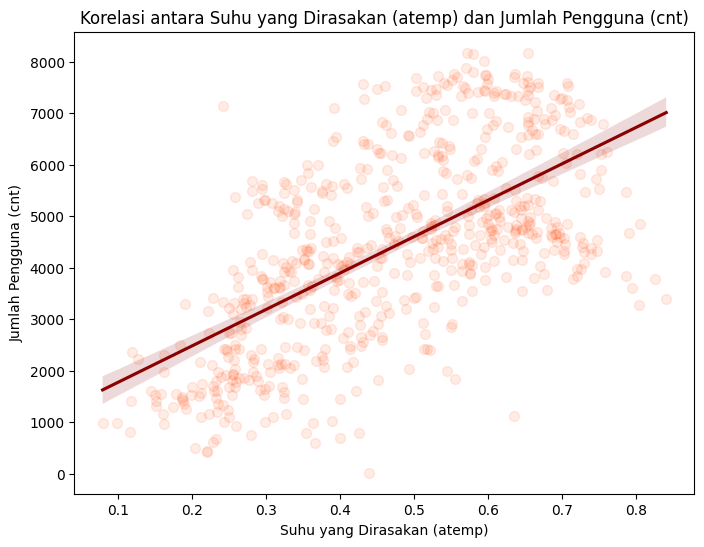

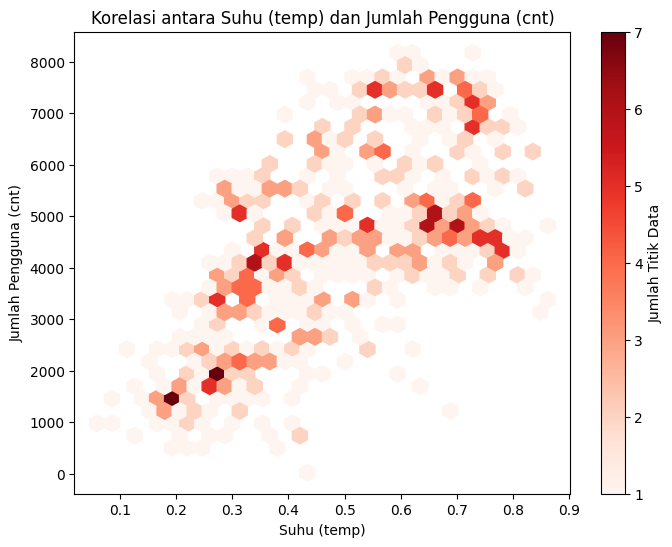

In [192]:

plt.figure(figsize=(8, 6))
sns.regplot(x='atemp', y='cnt', data=bike_day_df_relevant_q1, scatter_kws={"color": "#FF4500",'alpha':0.1, 's':50}, line_kws={"color": "#8B0000"})
plt.title('Korelasi antara Suhu yang Dirasakan (atemp) dan Jumlah Pengguna (cnt)')
plt.xlabel('Suhu yang Dirasakan (atemp)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(x='temp', y='cnt', data=bike_day_df_relevant_q1, gridsize=30, cmap='Reds', mincnt=1)
plt.colorbar(label='Jumlah Titik Data')
plt.title('Korelasi antara Suhu (temp) dan Jumlah Pengguna (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()




Alasan menggunakan scatterplot adalah karena data yang dianalisis berkorelasi sehingga masuk dalam kategori bivariate sehingga digunakan scatterplot (sesuai dengan modul)

#####Korelasi Negatif

<ipython-input-201-d4f656787fdd>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='weathersit', y='cnt', data=bike_day_df_relevant_q1,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future ver

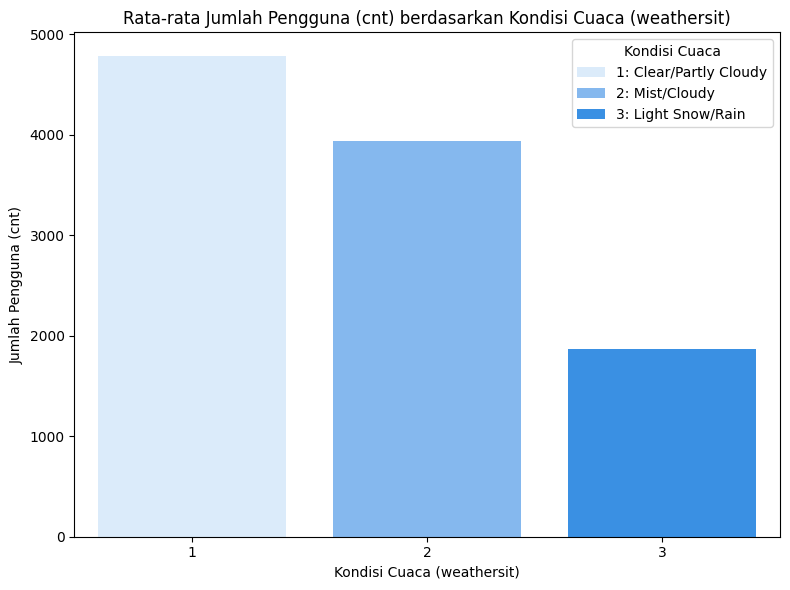

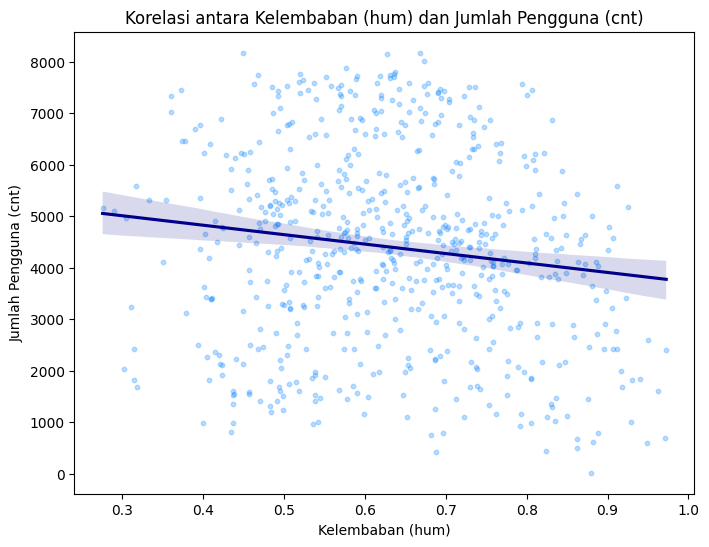

In [201]:
weather= [
    None,  # Placeholder for index 0 (not used)
    'Clear/Partly Cloudy',
    'Mist/Cloudy',
    'Light Snow/Rain',
    'Heavy Rain/Snow'
]
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='weathersit', y='cnt', data=bike_day_df_relevant_q1,
                 hue='weathersit',  # Assign 'x' to 'hue'
                 palette=["#D6EBFF", "#74B8FF", "#1E90FF"],
                 ci=None,
                 dodge=False,
                 legend=True)
plt.title('Rata-rata Jumlah Pengguna (cnt) berdasarkan Kondisi Cuaca (weathersit)')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Jumlah Pengguna (cnt)')
handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{i}: {weather[i]}" for i in range(1, len(weather))]
ax.legend(handles, new_labels, title="Kondisi Cuaca")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='hum', y='cnt', data=bike_day_df_relevant_q1, scatter_kws={"color": "#1E90FF",'alpha':0.3, 's':10}, line_kws={"color": "#00008B"})
plt.title('Korelasi antara Kelembaban (hum) dan Jumlah Pengguna (cnt)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()


Alasan menggunakan scatterplot adalah karena data yang dianalisis berkorelasi sehingga masuk dalam kategori bivariate sehingga digunakan scatterplot (sesuai dengan modul)

####Data Perjam

#####Korelasi Positif

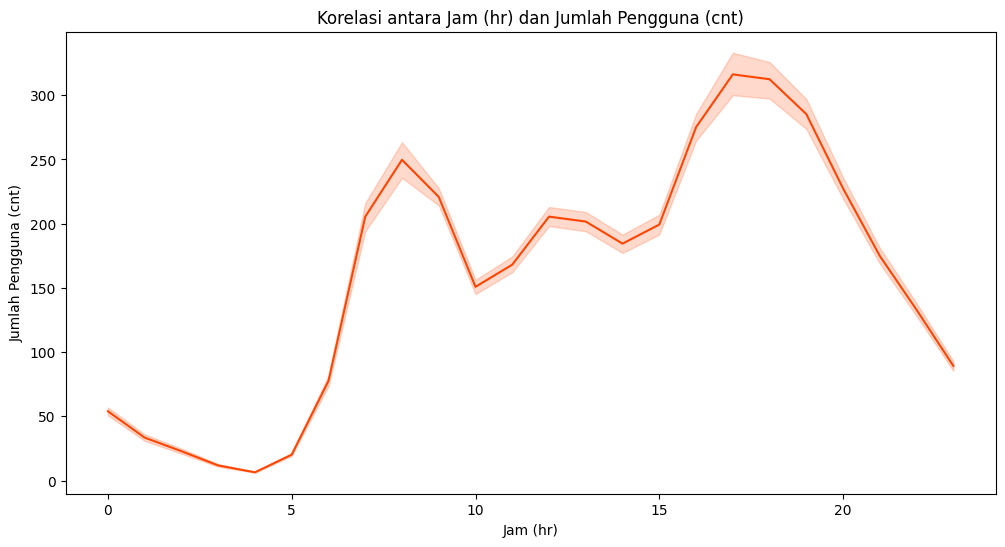

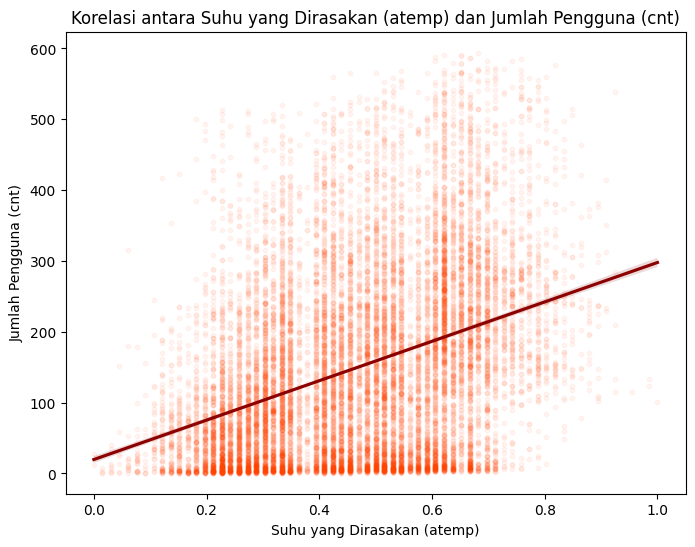

In [194]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=bike_hour_df_relevant_q1, color="#FF4500")
plt.title('Korelasi antara Jam (hr) dan Jumlah Pengguna (cnt)')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()


plt.figure(figsize=(8, 6))
sns.regplot(x='atemp', y='cnt', data=bike_hour_df_relevant_q1,
            scatter_kws={"color": "#FF4500", 'alpha':0.05, 's':10},
            line_kws={"color": "#8B0000"})
plt.title('Korelasi antara Suhu yang Dirasakan (atemp) dan Jumlah Pengguna (cnt)')
plt.xlabel('Suhu yang Dirasakan (atemp)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()





Alasan menggunakan linechart adalah karena data yang dianalisi merupakan rentang waktu sehingga grafik yang paling cocok adalah linechart (sesuai dengan modul)

Alasan menggunakan scatterplot adalah karena data yang dianalisis berkorelasi sehingga masuk dalam kategori bivariate sehingga digunakan scatterplot (sesuai dengan modul)

#####Korelasi Negatif

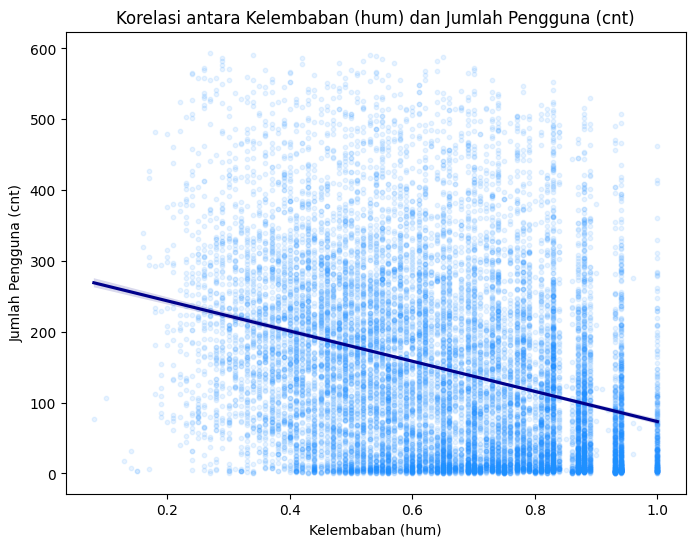

In [200]:
plt.figure(figsize=(8, 6))
sns.regplot(x='hum', y='cnt', data=bike_hour_df_relevant_q1,
            scatter_kws={"color": "#1E90FF", "alpha": 0.1, "s": 10},
            line_kws={"color": "#00008B"})
plt.title('Korelasi antara Kelembaban (hum) dan Jumlah Pengguna (cnt)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()



Alasan menggunakan scatterplot adalah karena data yang dianalisis berkorelasi sehingga masuk dalam kategori bivariate sehingga digunakan scatterplot (sesuai dengan modul)

### Pertanyaan 2: Seberapa banyak Registered user dan casual user?

####Data Harian

#####Pie Chart

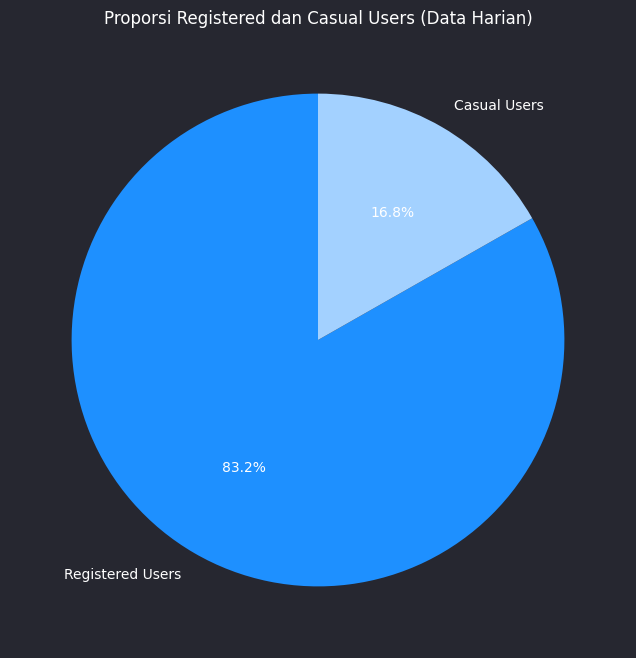

In [196]:
labels_day = ['Registered Users', 'Casual Users']
sizes_day = [total_registered_users, total_casual_users]
colors_day = ["#1E90FF", "#A3D1FF"]

plt.figure(figsize=(8, 8), facecolor='#262730')
plt.pie(sizes_day, labels=labels_day, colors=colors_day, autopct='%1.1f%%', startangle=90, textprops={'color':'white'})
plt.title('Proporsi Registered dan Casual Users (Data Harian)', color='white')
plt.show()

Alasan menggunakan pie chart adalah karena data yang dianalisis adalah pie chart sehingga menggunakan pie chart dapat dengan mudah mengetahui mayoritas pengguna

#####Bar Chart

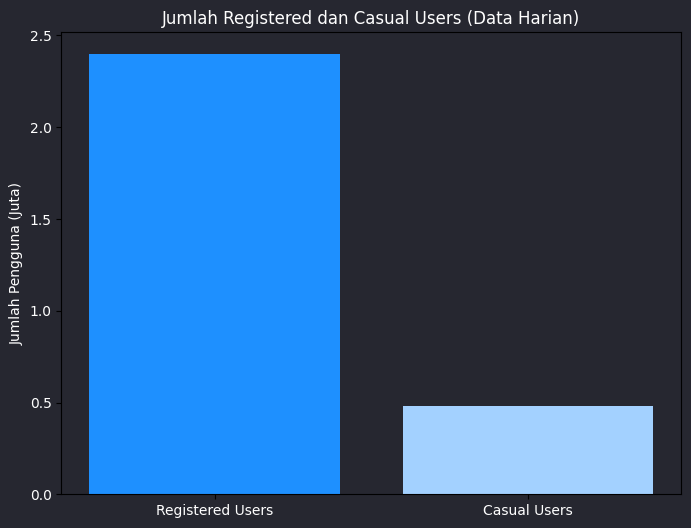

In [197]:
plt.figure(figsize=(8, 6), facecolor='#262730')
ax = plt.gca()
ax.set_facecolor('#262730')
plt.bar(labels_day, [size / 1000000 for size in sizes_day], color=["#1E90FF", "#A3D1FF"])
plt.title('Jumlah Registered dan Casual Users (Data Harian)', color='white')
plt.ylabel('Jumlah Pengguna (Juta)', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Alasan penggunaan bar chart adalah karena data yang dianalisis bersifat univariate

####Data per Jam

#####Pie Chart

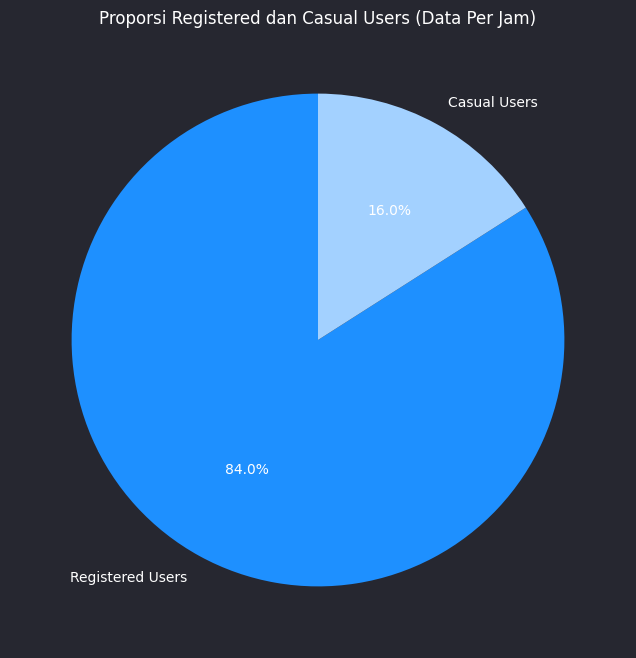

In [198]:
labels_hour = ['Registered Users', 'Casual Users']
sizes_hour = [total_registered_users_hour, total_casual_users_hour]
colors_hour = ["#1E90FF", "#A3D1FF"]
plt.figure(figsize=(8, 8), facecolor='#262730')
ax = plt.gca()
ax.set_facecolor('#262730')
plt.pie(sizes_hour, labels=labels_hour, colors=colors_hour, autopct='%1.1f%%', startangle=90,
        textprops={'color': 'white'})
plt.title('Proporsi Registered dan Casual Users (Data Per Jam)', color='white')
plt.show()

Alasan menggunakan pie chart adalah karena data yang dianalisis adalah pie chart sehingga menggunakan pie chart dapat dengan mudah mengetahui mayoritas pengguna

#####Bar Chart

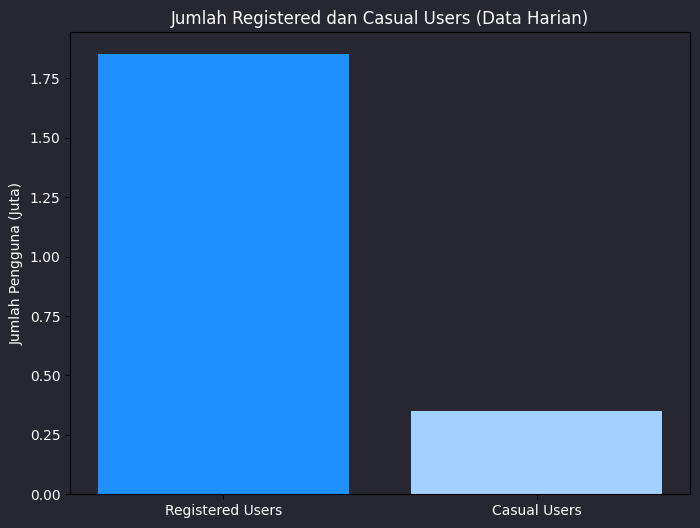

In [199]:
plt.figure(figsize=(8, 6), facecolor='#262730')
ax = plt.gca()
ax.set_facecolor('#262730')
plt.bar(labels_hour, [size / 1000000 for size in sizes_hour], color=["#1E90FF", "#A3D1FF"])  # Original colors
plt.title('Jumlah Registered dan Casual Users (Data Harian)', color='white')
plt.ylabel('Jumlah Pengguna (Juta)', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Alasan penggunaan bar chart adalah karena data yang dianalisis bersifat univariate

## Conclusion

**Pada dataset harian**
- Jumlah pengguna pada dataset harian sangat erat kaitannya dengan nilai suhu yang dirasakan (Korelasi Positif)
- Mayoritas pengguna sepeda merupakan pengguna yang terdaftar


**Pada dataset per jam**
- Berbeda dengan dataset harian pada dataset per jam banyaknya jumlah pesepeda tergantung dengan waktu pada rentang hari tersebut
- Mayoritas pengguna pada data set per jam juga merupakan pengguna terdaftar